In [1]:
import pandas as pd
pd.set_option('max_row',300) 
import os
import numpy as np
import tushare as ts

import sys
sys.path.append("../utils/")
import date_util
import enter_util
import plot_util
import token_util

##### 判断原则：达到要求后选vol_mean_20最大的。
##### 若不是选最大的，则查看其前段时间的增长速率，以及eda,dif的高度

### 计算当天可购买的原始数据

1. dea - macd < 0.2
2. macd 小于最近两个月的macd最大值

In [25]:
date = "20191104"
date, raw_choose = enter_util.get_weekk_condidate_stock(date)
choose_list = enter_util.get_condidate_stock(date, raw_choose)

In [26]:
choose_list

,index,stock_code,trade_date,name,dif_dea,dif_dea_day,vol_mean_20,vol_discount_mean,rank_factor
0,720,002821.SZ,20191104,凯莱英,3.304535,-0.351062,-0.903386,0.476070,0.835685
1,769,603658.SH,20191104,安图生物,3.997755,-1.037784,-1.005688,-0.010202,0.788592
2,3023,601998.SH,20191104,中信银行,-0.509689,0.096260,2.962172,-0.172615,0.424257
3,2117,002368.SZ,20191104,太极股份,-0.457789,0.926668,0.181490,1.125783,0.309451
4,523,002891.SZ,20191104,中宠股份,0.524344,-0.647990,-0.841792,1.821396,0.223626
5,1119,601689.SH,20191104,拓普集团,-0.231006,-0.029484,0.065606,1.362080,0.210339
6,3999,600704.SH,20191104,物产中大,-0.644056,0.969173,0.299718,0.737093,0.207980
7,1834,002649.SZ,20191104,博彦科技,-0.482406,0.683891,0.913277,-0.178803,0.138951
8,3999,600079.SH,20191104,人福医药,-0.199786,0.848135,-0.060151,0.193361,0.136333
9,1696,002688.SZ,20191104,金河生物,-0.370531,-0.340482,0.412317,1.082741,0.119756


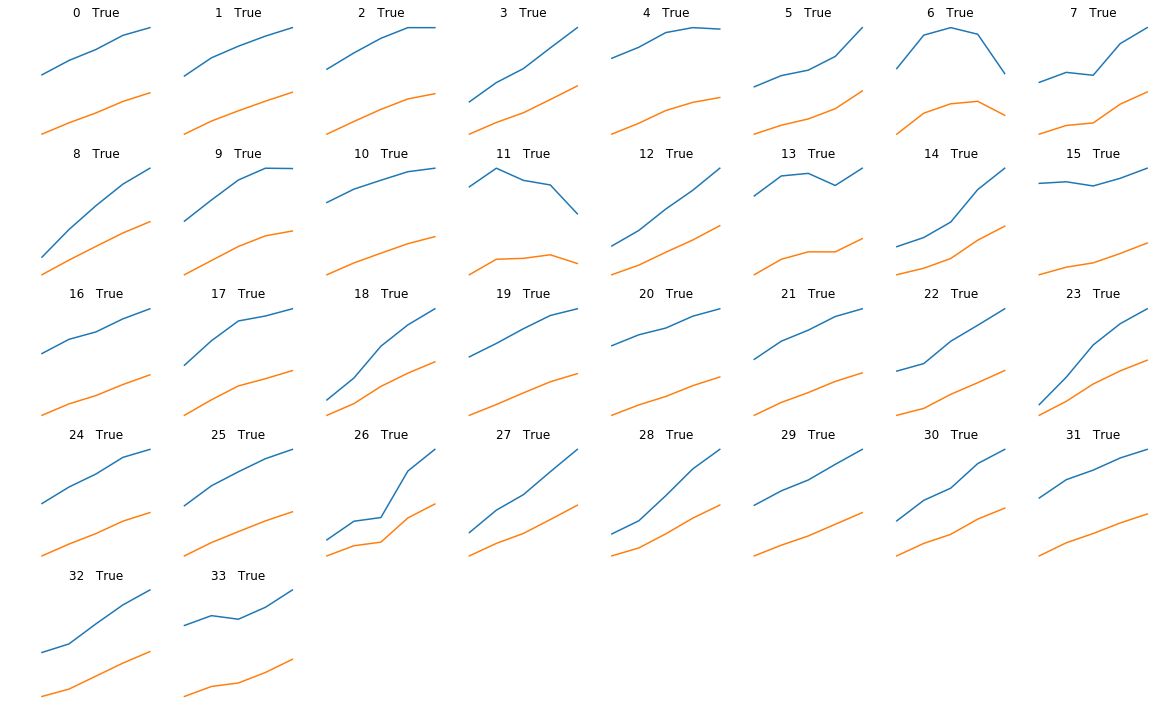

In [27]:
choose_data_plot = enter_util.enter_for_plot(choose_list)
enter_true, enter_false, enter_discount = plot_util.plot_enter(choose_data_plot)

In [28]:
# 在计算时已取反，故为大于
min_index = choose_list["dif_dea_day"].idxmin()
max_index = choose_list["dif_dea_day"].idxmax()
test1 = choose_list.drop([min_index,max_index], axis=0)
test1 = test1[test1["dif_dea_day"] > test1["dif_dea_day"].mean()]

In [29]:
test1 # len(test1)>8进行下一步 

,index,stock_code,trade_date,name,dif_dea,dif_dea_day,vol_mean_20,vol_discount_mean,rank_factor
2,3023,601998.SH,20191104,中信银行,-0.509689,0.096260,2.962172,-0.172615,0.424257
3,2117,002368.SZ,20191104,太极股份,-0.457789,0.926668,0.181490,1.125783,0.309451
6,3999,600704.SH,20191104,物产中大,-0.644056,0.969173,0.299718,0.737093,0.207980
7,1834,002649.SZ,20191104,博彦科技,-0.482406,0.683891,0.913277,-0.178803,0.138951
8,3999,600079.SH,20191104,人福医药,-0.199786,0.848135,-0.060151,0.193361,0.136333
11,3996,000028.SZ,20191104,国药一致,-0.259368,1.020595,-0.937077,0.794676,0.097828
12,651,002816.SZ,20191104,和科达,-0.170979,0.770513,-1.025820,0.935057,0.084656
13,3094,002078.SZ,20191104,太阳纸业,-0.473607,0.542623,0.163404,0.400453,0.079214
18,3999,600885.SH,20191104,宏发股份,-0.477749,1.172251,-0.840421,0.190420,-0.038874
22,2172,002392.SZ,20191104,北京利尔,-0.583786,0.579507,-0.337728,-0.084058,-0.143592


In [30]:
min_index = test1["dif_dea_day"].idxmin()
max_index = test1["dif_dea_day"].idxmax()
test2 = test1.drop([min_index,max_index], axis=0)
test2 = test2[test2["dif_dea_day"] > test2["dif_dea_day"].mean()]

In [31]:
test2 # len(test2)>=8进行下一步

,index,stock_code,trade_date,name,dif_dea,dif_dea_day,vol_mean_20,vol_discount_mean,rank_factor
3,2117,002368.SZ,20191104,太极股份,-0.457789,0.926668,0.181490,1.125783,0.309451
6,3999,600704.SH,20191104,物产中大,-0.644056,0.969173,0.299718,0.737093,0.207980
8,3999,600079.SH,20191104,人福医药,-0.199786,0.848135,-0.060151,0.193361,0.136333
11,3996,000028.SZ,20191104,国药一致,-0.259368,1.020595,-0.937077,0.794676,0.097828
12,651,002816.SZ,20191104,和科达,-0.170979,0.770513,-1.025820,0.935057,0.084656
18,3999,600885.SH,20191104,宏发股份,-0.477749,1.172251,-0.840421,0.190420,-0.038874
27,2368,002318.SZ,20191104,久立特材,-0.519568,0.948668,0.558681,-2.004928,-0.255386
30,1081,603198.SH,20191104,迎驾贡酒,-0.320881,0.907217,-0.434263,-1.473380,-0.296350


重点关注test4，但也不忽视test2

In [32]:
min_index = test2["dif_dea"].idxmin()
test3 = test2.drop([min_index], axis=0)
test3= test3[test3["dif_dea"]> test3["dif_dea"].mean()]

In [33]:
test3 # len(test3) <= len(test2) / 2 返回上一步

,index,stock_code,trade_date,name,dif_dea,dif_dea_day,vol_mean_20,vol_discount_mean,rank_factor
8,3999,600079.SH,20191104,人福医药,-0.199786,0.848135,-0.060151,0.193361,0.136333
11,3996,000028.SZ,20191104,国药一致,-0.259368,1.020595,-0.937077,0.794676,0.097828
12,651,002816.SZ,20191104,和科达,-0.170979,0.770513,-1.025820,0.935057,0.084656
30,1081,603198.SH,20191104,迎驾贡酒,-0.320881,0.907217,-0.434263,-1.473380,-0.296350


In [21]:
min_index = test2["vol_mean_20"].idxmin()
test4 = test2.drop([min_index], axis=0)
test4= test4[test4["vol_mean_20"] > test4["vol_mean_20"].mean()]

In [22]:
test4 # len(test4) <= len(test2) / 2 返回上一步

,index,stock_code,trade_date,name,dif_dea,dif_dea_day,vol_mean_20,vol_discount_mean,rank_factor
8,1800,002657.SZ,20191105,中科金财,-0.681083,1.015753,-0.281779,0.881191,0.118708
31,4000,600869.SH,20191105,智慧能源,-0.621769,0.766664,0.115307,-1.440493,-0.298235


### 对周k值进行筛选，剔除月k增长过慢的数据(0.04)

In [191]:
test_dif_dea = choose_list[choose_list["dif_dea"] > 0.05 ]

In [192]:
test_dif_dea

,index,stock_code,trade_date,name,dif_dea,dif_dea_0,revenue_mean,vol_mean_20,vol_discount_mean,rank_factor
1,3960,000519.SZ,20190902,中兵红箭,0.096063,-0.003129,0.708039,495468.7315,1.748179,99094.230960
7,2890,601808.SH,20190902,中海油服,0.159121,-0.004853,0.786317,102085.7880,1.528857,20417.629055
8,3960,000950.SZ,20190902,重药控股,0.053289,-0.005262,0.688062,91999.8085,1.667091,18400.414314
11,3434,002025.SZ,20190902,航天电器,0.346147,0.019806,0.827409,70923.0915,0.968324,14185.039920
19,2421,002294.SZ,20190902,信立泰,0.065282,-0.002448,0.658768,42178.3145,1.370126,8436.055325
21,3960,001872.SZ,20190902,招商港口,0.139084,0.009176,0.733599,34805.2205,1.381836,6961.472232
22,1024,002755.SZ,20190902,奥赛康,0.056974,-0.010211,0.695590,33454.3490,1.420239,6691.275278
27,781,002801.SZ,20190902,微光股份,0.357187,0.030788,0.790432,19549.0750,1.105348,3910.261791
28,726,603520.SH,20190902,司太立,0.091267,-0.006715,0.734482,18460.6960,1.545366,3692.585826
30,1197,603806.SH,20190902,福斯特,0.289425,0.020582,0.593928,14592.7600,1.292178,2918.986352


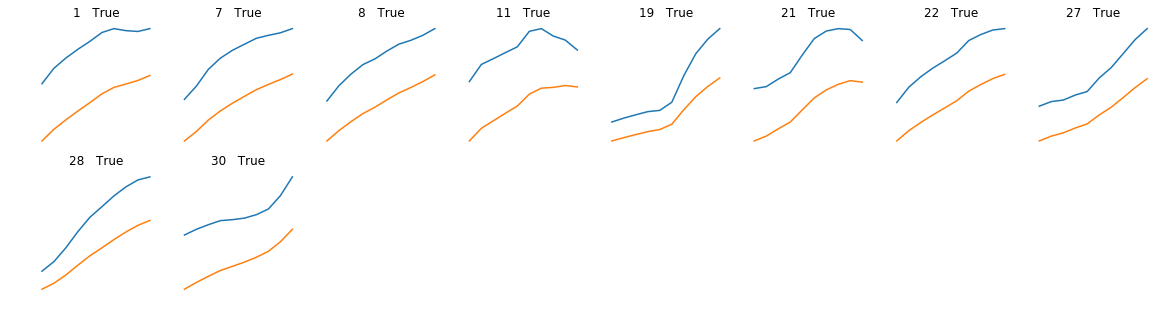

In [193]:
test_dif_dea_plot = enter_util.enter_for_plot(test_dif_dea)
enter_true, enter_false, enter_discount = plot_util.plot_enter(test_dif_dea_plot)

In [181]:
enter_discount

1.0

### 对日k进行筛选，剔除dif，dea较大的数据(待定)

In [194]:
test_dif_dea_0 = test_dif_dea[test_dif_dea["dif_dea_0"] < 0.022 ]

In [195]:
test_dif_dea_0

,index,stock_code,trade_date,name,dif_dea,dif_dea_0,revenue_mean,vol_mean_20,vol_discount_mean,rank_factor
1,3960,000519.SZ,20190902,中兵红箭,0.096063,-0.003129,0.708039,495468.7315,1.748179,99094.230960
7,2890,601808.SH,20190902,中海油服,0.159121,-0.004853,0.786317,102085.7880,1.528857,20417.629055
8,3960,000950.SZ,20190902,重药控股,0.053289,-0.005262,0.688062,91999.8085,1.667091,18400.414314
11,3434,002025.SZ,20190902,航天电器,0.346147,0.019806,0.827409,70923.0915,0.968324,14185.039920
19,2421,002294.SZ,20190902,信立泰,0.065282,-0.002448,0.658768,42178.3145,1.370126,8436.055325
21,3960,001872.SZ,20190902,招商港口,0.139084,0.009176,0.733599,34805.2205,1.381836,6961.472232
22,1024,002755.SZ,20190902,奥赛康,0.056974,-0.010211,0.695590,33454.3490,1.420239,6691.275278
28,726,603520.SH,20190902,司太立,0.091267,-0.006715,0.734482,18460.6960,1.545366,3692.585826
30,1197,603806.SH,20190902,福斯特,0.289425,0.020582,0.593928,14592.7600,1.292178,2918.986352


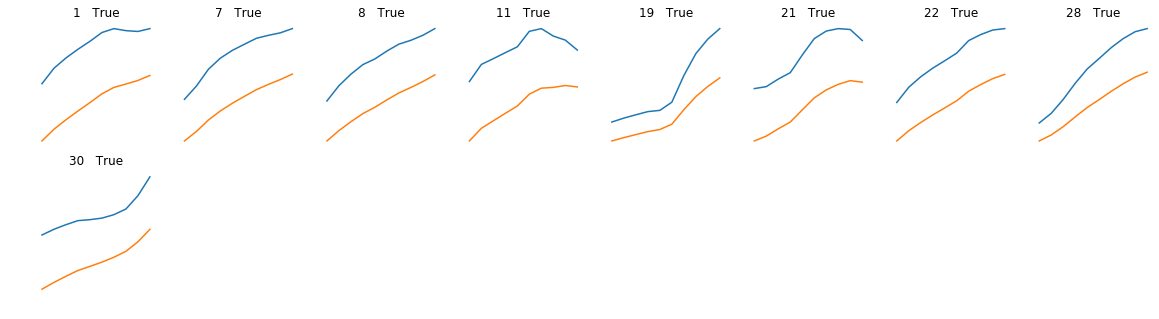

In [196]:
test_dif_dea_0_plot = enter_util.enter_for_plot(test_dif_dea_0)
enter_true, enter_false, enter_discount = plot_util.plot_enter(test_dif_dea_0_plot)

In [173]:
enter_discount

1.0